In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# My class baby
from logistic_regression import LogisticRegression

In [2]:
# Define hex colors
PRIMARY_COLOR = '#1f77b4'
SECONDARY_COLOR = '#124062'
EDGE_COLOR = '#1F1F1F'
GRID_TEXT_COLOR = '#878787'
BACKGROUND_COLOR = '#1F1F1F'

# Set plot style
plt.rcParams['axes.facecolor'] = BACKGROUND_COLOR
plt.rcParams['figure.facecolor'] = BACKGROUND_COLOR
plt.rcParams['axes.edgecolor'] = EDGE_COLOR
plt.rcParams['text.color'] = GRID_TEXT_COLOR
plt.rcParams['axes.labelcolor'] = GRID_TEXT_COLOR
plt.rcParams['axes.titlecolor'] = GRID_TEXT_COLOR
plt.rcParams['xtick.color'] = GRID_TEXT_COLOR
plt.rcParams['ytick.color'] = GRID_TEXT_COLOR
plt.rcParams['grid.color'] = GRID_TEXT_COLOR
plt.rcParams['grid.alpha'] = 0.2

In [3]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
for col in df.columns:
    count = (df[col] == '?').sum()
    if count > 0:
        print(f"Column {col} has {count} question marks.")

Column workclass has 1836 question marks.
Column occupation has 1843 question marks.
Column native.country has 583 question marks.


In [7]:
for col in ["workclass", "occupation", "native.country"]:
    df[col] = df[col].replace("?", df[col].mode()[0])

df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
for col in df.columns:
    count = (df[col] == '?').sum()
    if count > 0:
        print(f"Column {col} has {count} question marks.")

In [9]:
df = df.drop(columns=["fnlwgt", "education"])
df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
df['native.country'].value_counts()

native.country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [11]:
num_columns = df.select_dtypes(include="number")
num_columns.columns

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

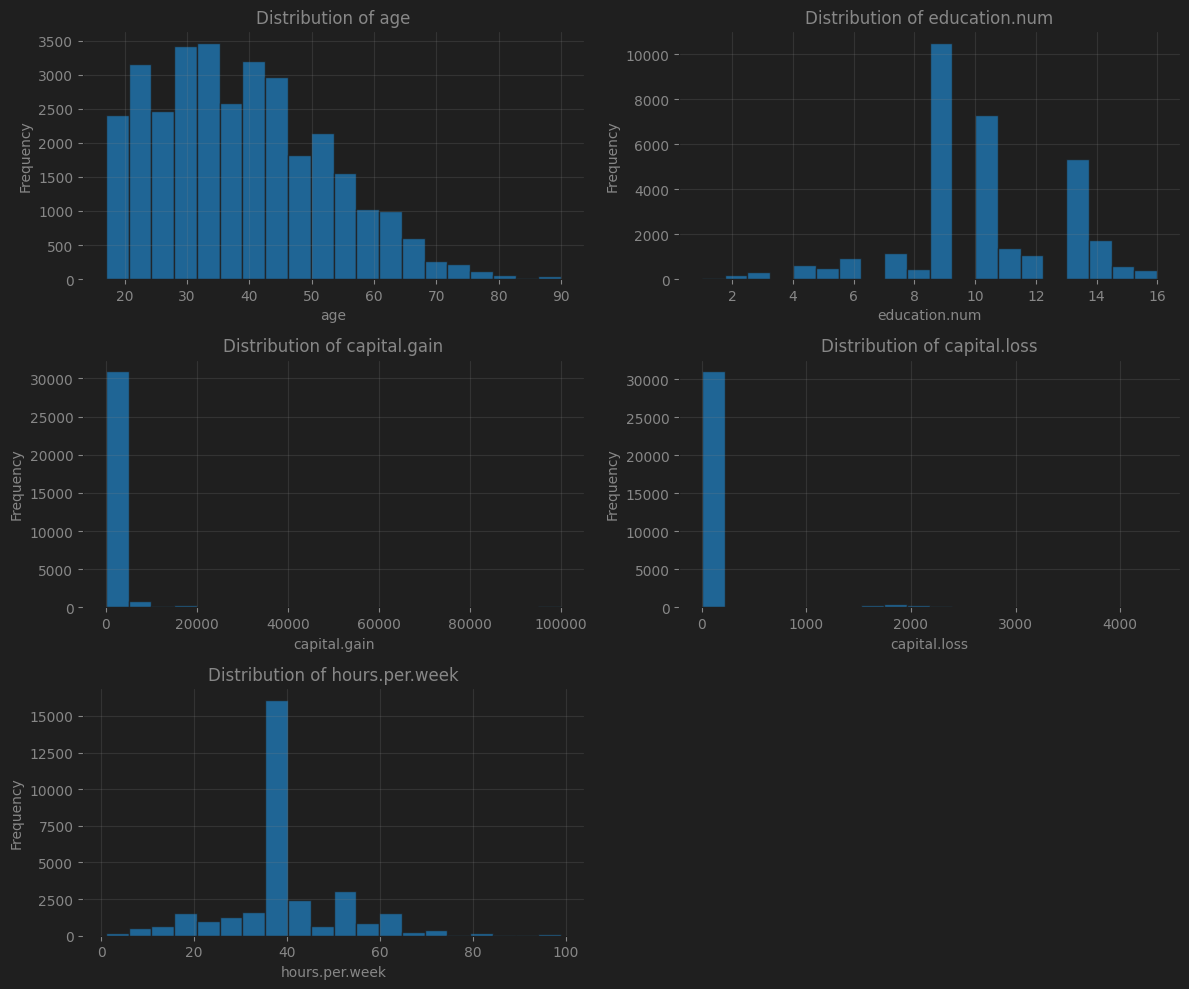

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
ax = ax.flatten()

for i, col in enumerate(num_columns.columns):
    ax[i].hist(df[col], bins=20, color=PRIMARY_COLOR, edgecolor=EDGE_COLOR, alpha=0.8)
    ax[i].set_title(f"Distribution of {col}")
    ax[i].set_xlabel(col)
    ax[i].set_ylabel("Frequency")
    ax[i].grid(True)

fig.delaxes(ax[5])
plt.tight_layout()
plt.show()

### Encoding

In [13]:
df["sex"] = df["sex"].map({"Male":1, "Female":0})
df["income"] = df["income"].map({">50K":1, "<=50K":0})
df["native.country"] = df["native.country"].apply(lambda x: 1 if  x == "United-States" else 0)

In [14]:
columns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race']

le = LabelEncoder()

for col in columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [15]:
columns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race']
df_one = pd.get_dummies(df, columns=columns, drop_first=True, dtype=int)

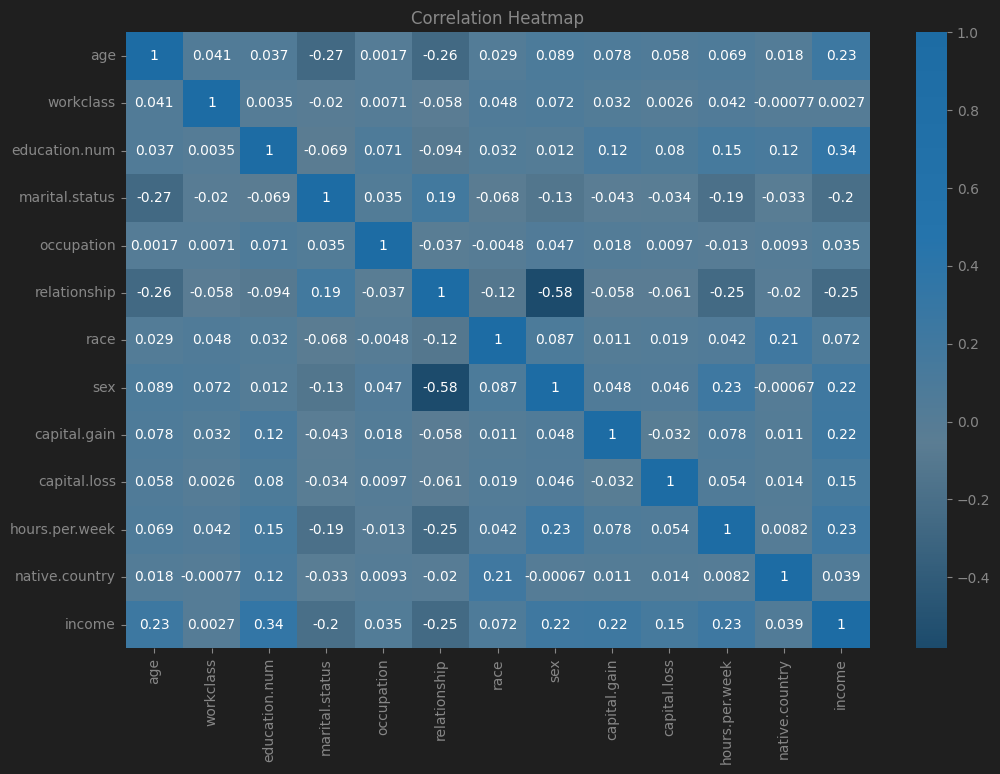

In [16]:
colors = ["#1C4B6C", "#5b7d93", "#2574ac", "#1D6CA4"]
custom_cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=256)

corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap=custom_cmap)
plt.title("Correlation Heatmap")
plt.show()

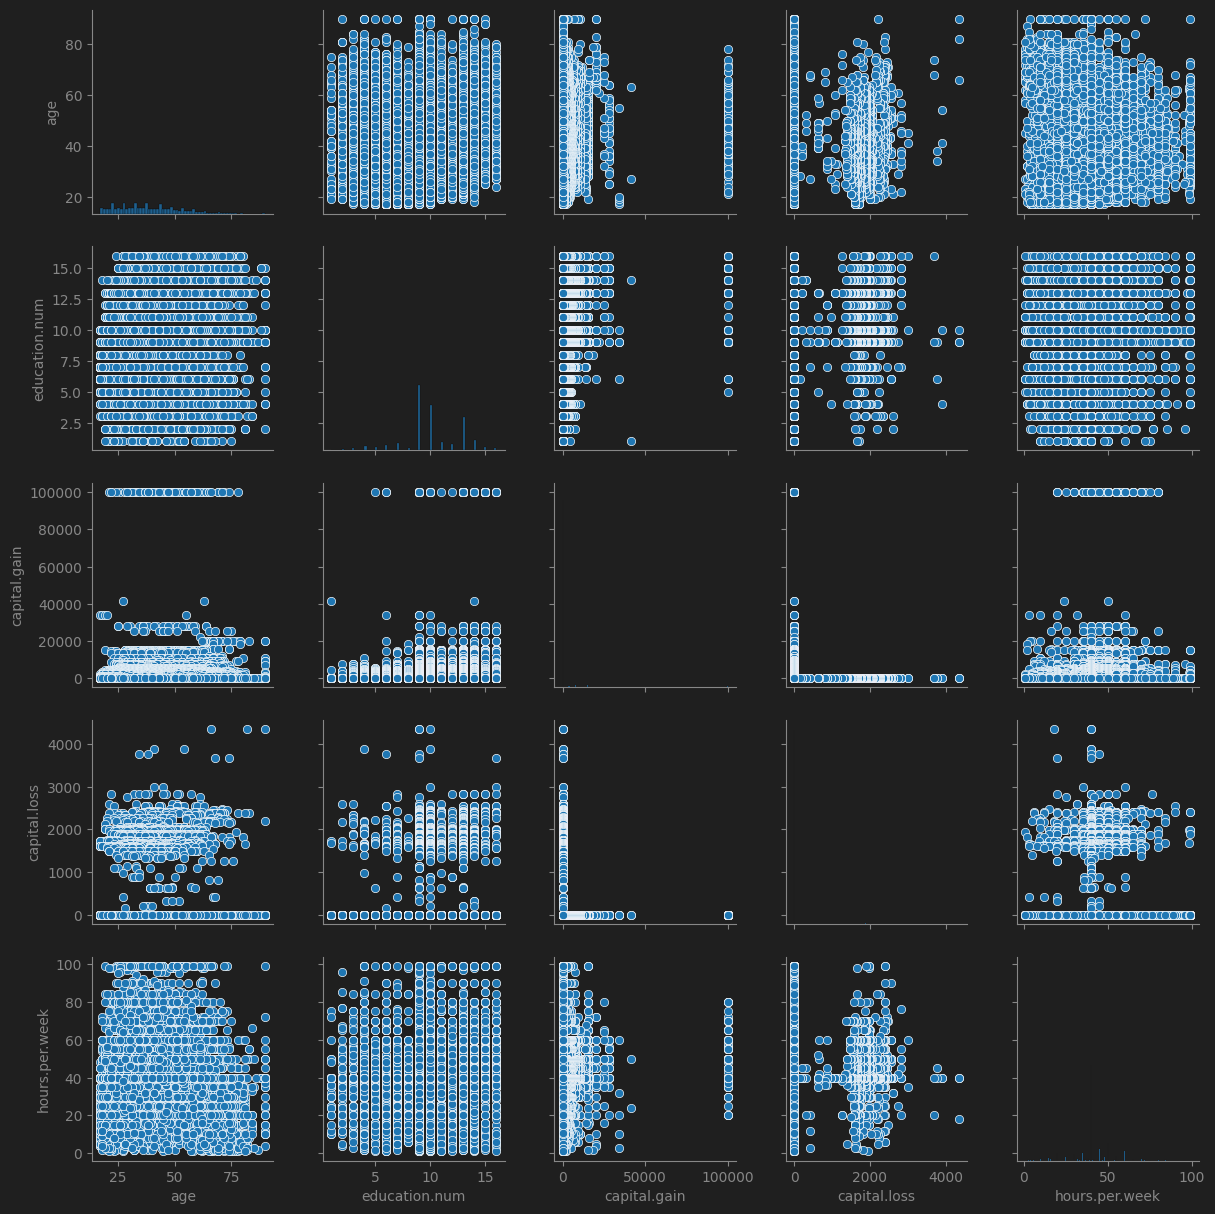

In [17]:
plt.rcParams['axes.edgecolor'] = GRID_TEXT_COLOR
sns.pairplot(df[['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']], plot_kws={'color':PRIMARY_COLOR}, diag_kws={'color':PRIMARY_COLOR})
plt.tight_layout(pad=2)
plt.show()

In [18]:
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = LogisticRegression(learning_rate=0.1, n_iterations=1000, regularization=0.1)
model.fit(X_train, y_train)

,learning_rate,0.1
,n_iterations,1000
,regularization,0.1


In [21]:
y_pred = model.predict(X_test)

train_acc = model.score(X_train, y_train)
print(f"Train Accuracy: {train_acc}")

test_acc = model.score(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

Train Accuracy: 0.823902027027027
Test Accuracy: 0.8229694457239367


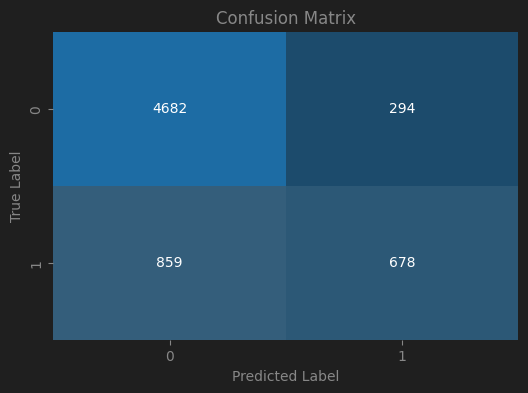

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4976
           1       0.70      0.44      0.54      1537

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.72      6513
weighted avg       0.81      0.82      0.81      6513



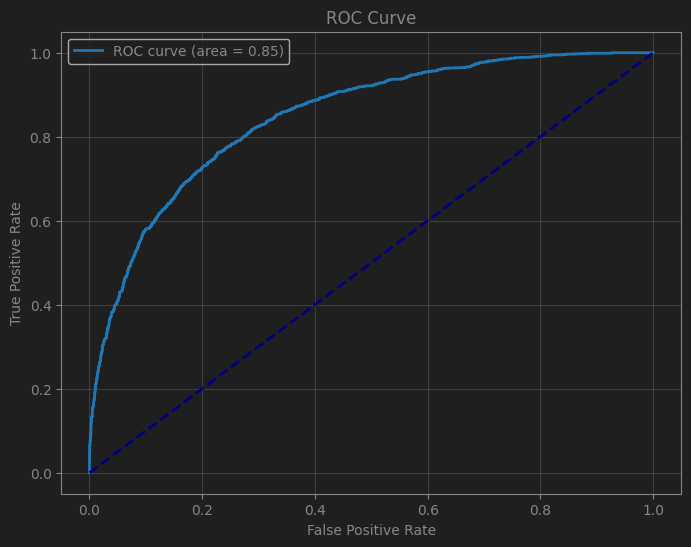

In [24]:
y_probs = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=PRIMARY_COLOR, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()